In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import driver
import robo_supply_model

In [4]:
emissions_start = 5_000_000
emissions_end = 500_000
emissions_total_target = 197_000_000
# emissions_total_target = 125_000_000
subnet_maintenance_fee_pct = 0.25

In [5]:
airdrop_vest = 6
community_vest = 12

In [6]:
ent_arrival_rate = 100.0
num_ents_start_desired = 500
num_ents_start_config = num_ents_start_desired - ent_arrival_rate

df_baseline = driver.sim2(
    initial_ents=int(num_ents_start_config),
    initial_subnets=10,
    target_subnets_month_48=30,
    post_48_subnets_per_year=1,
    ent_arrival_rate=ent_arrival_rate,  # average new entities per month
    ent_lifetime_months=24,  # entities depart after this many months
    subnet_lifetime_months=36,  # subnets depart after this many months
    initial_subnet_revenue=0,  # $100k initial revenue per subnet per month
    max_subnet_revenue=100000,  # $1M max revenue per subnet per month
    revenue_growth_months=48,  # months to reach max revenue
    revenue_burn_pct=0.5,  
    initial_token_price=0.3,  # $0.30 initial token price
    annual_price_growth_rate=0.0,  # 1% annual growth rate
    initial_target_staking_apy=0.08,  # 8% initial target staking APY
    final_target_staking_apy=0.04,  # 4% final target staking APY
    staking_apy_transition_months=48,  # months to transition from initial to final APY
    linear_start_emission=emissions_start,
    linear_end_emission=emissions_end,
    linear_total_emissions=emissions_total_target,
    dynamic_staking_fees=False,
    airdrop_allocation=50_000_000,  # 50M airdrop allocation
    community_round_allocation=50_000_000,  # 50M community round allocation
    airdrop_vesting_months=airdrop_vest, 
    community_round_vesting_months=community_vest,
    subnet_maintenance_fee_pct=subnet_maintenance_fee_pct,
)

7462121.212121212 746212.1212121212


In [7]:
(784090.9090909091-7840909.090909091)/47

-150145.0676982592

In [8]:
4/47

0.0851063829787234

239936994.32061493


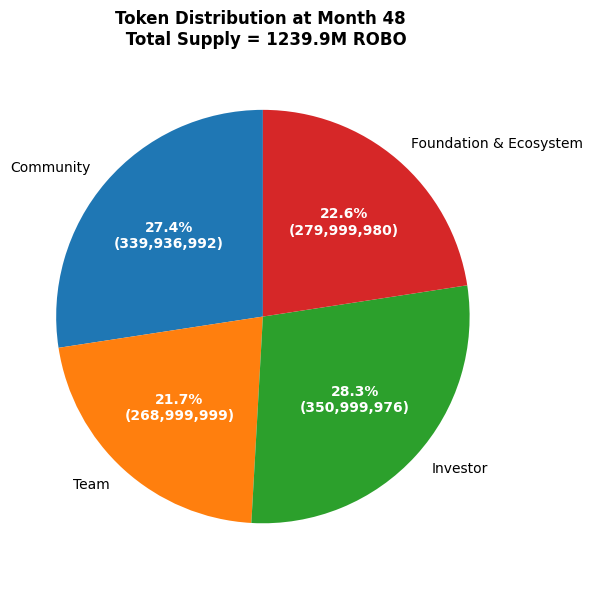

In [9]:
dff = df_baseline
mo = 48
community = dff['cumulative_emissions'].iloc[mo] + dff['airdrop_released'].iloc[mo] + dff['community_round_released'].iloc[mo]
team = dff['team_vested'].iloc[mo]
investor = dff['investor_vested'].iloc[mo]
foundation = dff['foundation_vested'].iloc[mo]
total= community + team + investor + foundation
# make a pie chart of this at month 48
# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
labels = ['Community', 'Team', 'Investor', 'Foundation & Ecosystem']
sizes = [community, team, investor, foundation]
# colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct

# Create the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels,
                                   autopct=make_autopct(sizes), startangle=90)

# Customize the text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add title
emissions_total_48 = dff['cumulative_emissions'].iloc[mo]
print(emissions_total_48)

# ax.set_title(f'Token Distribution at Month {mo}: Total Supply = {total/1e6:.1f}M \n (Rewards + Staking Emissions + Airdrop + Community Round) = {emissions_total_48/1e6:.1f}M', fontweight='bold')
ax.set_title(f'Token Distribution at Month {mo} \n Total Supply = {total/1e6:.1f}M ROBO', fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.tight_layout()
plt.savefig('supply_mo48.png')

In [10]:
# print teh total subnet emissions at month 48
dff['subnet_rewards'].cumsum().iloc[mo]/1e6


np.float64(198.0324702777778)

In [11]:
dff.columns

Index(['month', 'team_vested', 'investor_vested', 'foundation_vested',
       'airdrop_released', 'community_round_released',
       'airdrop_monthly_release', 'community_round_monthly_release',
       'base_emissions', 'net_base_emissions', 'additional_staking_emissions',
       'total_emissions', 'burn', 'circulating_supply', 'total_locked_supply',
       'staking_supply', 'ent_collateral', 'subnet_collateral',
       'staking_rewards', 'subnet_rewards', 'staking_apy',
       'target_staking_budget', 'actual_staking_budget',
       'subnet_guaranteed_emissions', 'ent_registration_fees',
       'subnet_registration_fees', 'subnet_maintenance_fees', 'total_fees',
       'active_ents', 'active_subnets', 'total_collateral', 'new_ents',
       'new_subnets', 'ent_departures', 'subnet_departures',
       'cumulative_emissions', 'cumulative_burn', 'cumulative_fixed_emissions',
       'cumulative_fees', 'ent_registration_fee', 'subnet_registration_fee',
       'ent_collateral_amount', 'subne

In [12]:
def plot_simulation(df):
    """
    Plot simulation results in two separate figures with logical grouping.
    
    Figure 1: Supply & Distribution Metrics (1x3)
    Figure 2: Protocol Dynamics & Economics (2x2)
    """
    
    # ========== FIGURE 1: Supply & Distribution Metrics ==========
    fig1, ax1 = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)
    
    # Plot 1: Supply Components
    axx = ax1[0]
    axx.plot(df['month'], df['team_vested']/1e6, label='Team')
    axx.plot(df['month'], df['investor_vested']/1e6, label='Investor')
    axx.plot(df['month'], df['foundation_vested']/1e6, label='Foundation & Ecosystem')
    axx.plot(df['month'], df['cumulative_emissions']/1e6, label='Community')
    axx.legend(fontsize=8)
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('M-ROBO', fontsize=10)
    axx.set_title('Supply Components', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 2: Circulating Supply
    axx = ax1[1]
    axx.plot(df['month'], df['circulating_supply']/1e6, linewidth=2, color='#2E86AB')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('M-ROBO', fontsize=10)
    axx.set_title('Circulating Supply', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 3: Locked/Circulating Percentage
    axx = ax1[2]
    axx.plot(df['month'], df['total_locked_supply']/df['circulating_supply']*100, linewidth=2, color='#A23B72')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('%', fontsize=10)
    axx.set_title('Locked/Circulating Pct.', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ========== FIGURE 2: Protocol Dynamics & Economics ==========
    fig2, ax2 = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
    
    # Plot 1: Monthly Inflation Rate
    axx = ax2[0, 0]
    axx.plot(df['month'], df['total_emissions']/df['circulating_supply'].shift(1)*100, linewidth=2, color='#06A77D')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('%', fontsize=10)
    axx.set_title('Monthly Inflation Rate', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 2: Burn/Emissions Percentage
    axx = ax2[0, 1]
    axx.plot(df['month'], df['cumulative_burn']/df['cumulative_emissions']*100, linewidth=2, color='#D62828')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('%', fontsize=10)
    axx.set_title('Burn/Emissions Pct.', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 3: Subnet Reward Emissions
    axx = ax2[1, 0]
    axx.plot(df['month'], df['base_emissions']/1e6, linewidth=2, color='#6A4C93')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('M-ROBO', fontsize=10)
    axx.set_title('Subnet Reward Emissions', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 4: Cumulative Fees Collected
    axx = ax2[1, 1]
    axx.plot(df['month'], df['cumulative_fees']/1e6, linewidth=2, color='#F18F01')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('M-ROBO', fontsize=10)
    axx.set_title('Cumulative Fees Collected', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [13]:
df_baseline['circulating_supply'].iloc[0:12]/1e6

0      42.699100
1      59.990755
2      77.253228
3      94.425374
4     111.503470
5     128.483607
6     139.532011
7     150.469150
8     161.292143
9     172.000162
10    182.591972
11    193.066724
Name: circulating_supply, dtype: float64

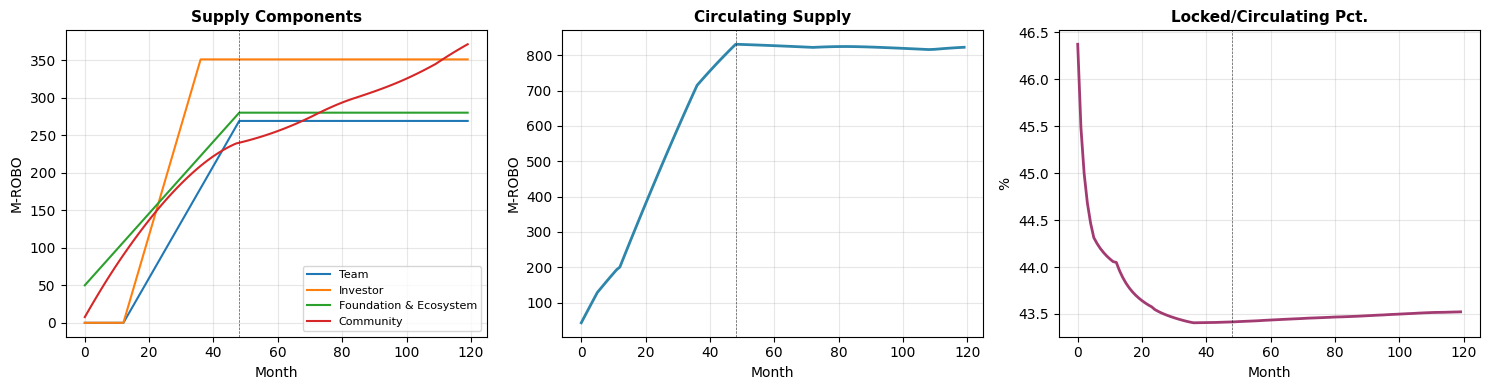

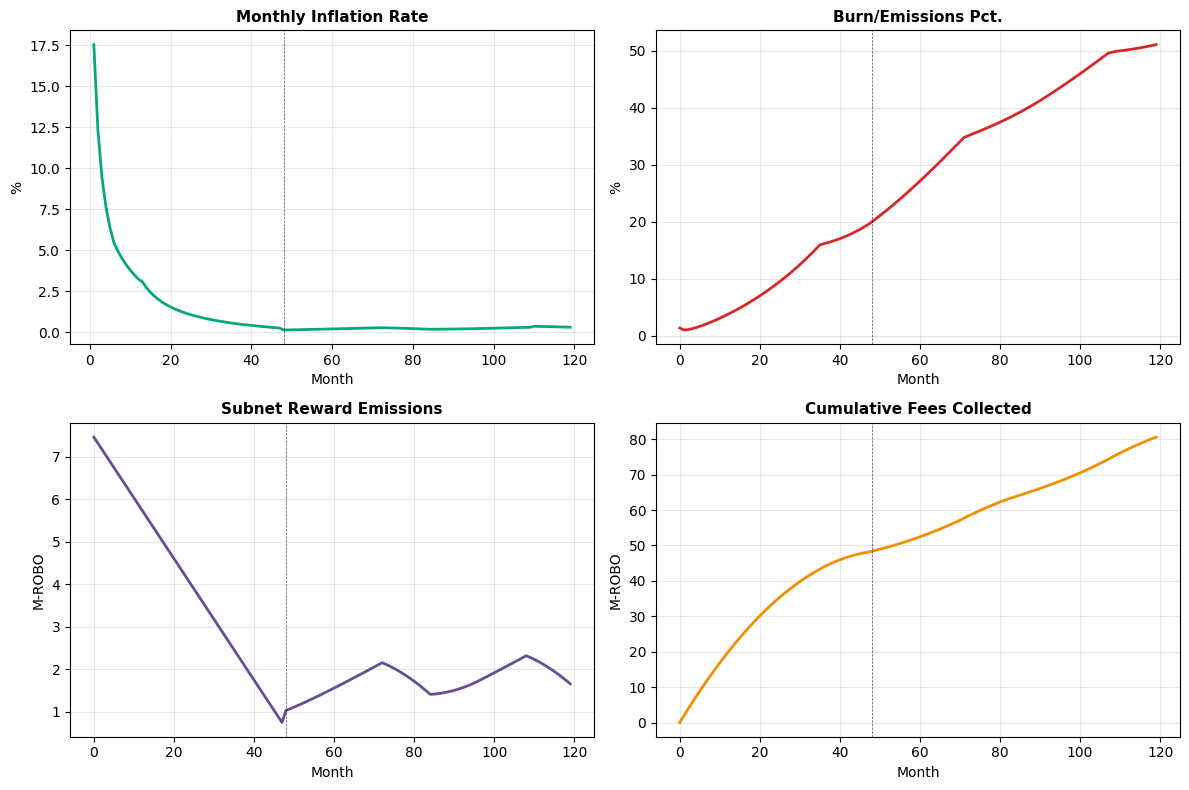

In [14]:
plot_simulation(df_baseline)

In [15]:
df_copy = robo_supply_model.print_yearly_emissions_percentage(df_baseline)

Emissions as % of Total Supply by Year:
Year 1: 84,175,821 ROBO / 1,084,175,821 ROBO = 7.76%
Year 2: 68,577,782 ROBO / 1,152,753,602 ROBO = 5.95%
Year 3: 52,760,736 ROBO / 1,205,514,339 ROBO = 4.38%
Year 4: 33,390,185 ROBO / 1,238,904,524 ROBO = 2.70%
Year 5: 15,119,573 ROBO / 1,254,024,097 ROBO = 1.21%
Year 6: 21,907,737 ROBO / 1,275,931,834 ROBO = 1.72%
Year 7: 22,278,611 ROBO / 1,298,210,445 ROBO = 1.72%
Year 8: 18,111,571 ROBO / 1,316,322,016 ROBO = 1.38%
Year 9: 23,880,387 ROBO / 1,340,202,403 ROBO = 1.78%
Year 10: 30,967,114 ROBO / 1,371,169,517 ROBO = 2.26%


In [16]:
# sanity check the community emissions
df_copy['emissions_noairdropcommunity'] = df_copy['total_emissions'] + df_copy['airdrop_monthly_release'] + df_copy['community_round_monthly_release']
yearly_emissions = df_copy.groupby('year')['emissions_noairdropcommunity'].sum()
yearly_emissions

year
1     1.841758e+08
2     6.857778e+07
3     5.276074e+07
4     3.339019e+07
5     1.511957e+07
6     2.190774e+07
7     2.227861e+07
8     1.811157e+07
9     2.388039e+07
10    3.096711e+07
Name: emissions_noairdropcommunity, dtype: float64

In [17]:
robo_supply_model.print_yearly_subnet_rewards(df_baseline)

Total Subnet Rewards by Year:
Year 1: 80,114,603 ROBO (80.11M ROBO)
Year 2: 59,538,201 ROBO (59.54M ROBO)
Year 3: 38,961,799 ROBO (38.96M ROBO)
Year 4: 18,385,397 ROBO (18.39M ROBO)
Year 5: 15,119,573 ROBO (15.12M ROBO)
Year 6: 21,907,737 ROBO (21.91M ROBO)
Year 7: 22,278,611 ROBO (22.28M ROBO)
Year 8: 18,111,571 ROBO (18.11M ROBO)
Year 9: 23,880,387 ROBO (23.88M ROBO)
Year 10: 24,247,256 ROBO (24.25M ROBO)

Total Subnet Rewards by Year (USD):
Year 1: $24,034,381 (avg price: $0.30)
Year 2: $17,861,460 (avg price: $0.30)
Year 3: $11,688,540 (avg price: $0.30)
Year 4: $5,515,619 (avg price: $0.30)
Year 5: $4,535,872 (avg price: $0.30)
Year 6: $6,572,321 (avg price: $0.30)
Year 7: $6,683,583 (avg price: $0.30)
Year 8: $5,433,471 (avg price: $0.30)
Year 9: $7,164,116 (avg price: $0.30)
Year 10: $7,274,177 (avg price: $0.30)

Average Per-Subnet Rewards by Year:
Year 1: 6,517,798 ROBO ($1,955,339) per subnet (avg 12.3 subnets)
Year 2: 3,443,173 ROBO ($1,032,952) per subnet (avg 17.3 subnets)

year
1     8.011460e+07
2     5.953820e+07
3     3.896180e+07
4     1.838540e+07
5     1.511957e+07
6     2.190774e+07
7     2.227861e+07
8     1.811157e+07
9     2.388039e+07
10    2.424726e+07
Name: base_emissions, dtype: float64

In [18]:
robo_supply_model.print_yearly_subnet_rewards_table(df_baseline, units='ROBO')


Average Per-Subnet Rewards by Year (NET - After Maintenance Fees) - ROBO
Year   Avg Subnets   Per Subnet         Fees               Revenue Burn       Total Capture     
--------------------------------------------------------------------------------------------------------------
1      12.3              5,040,121 ROBO    18,400,337 ROBO     2,609,954 ROBO    21,010,291 ROBO
2      17.3              2,582,380 ROBO    15,027,150 ROBO     9,901,620 ROBO    24,928,771 ROBO
3      22.3              1,310,864 ROBO     9,883,750 ROBO    19,693,287 ROBO    29,577,037 ROBO
4      27.3                505,248 ROBO     4,815,166 ROBO    13,547,454 ROBO    18,362,619 ROBO
5      30.5                372,301 ROBO     3,930,860 ROBO    20,584,491 ROBO    24,515,351 ROBO
6      31.5                522,304 ROBO     5,625,734 ROBO    28,542,824 ROBO    34,168,558 ROBO
7      32.5                514,782 ROBO     5,794,569 ROBO    18,563,657 ROBO    24,358,227 ROBO
8      33.5                405,988 ROBO

In [19]:
robo_supply_model.print_yearly_subnet_rewards_table(df_baseline, units='USD')


Average Per-Subnet Rewards by Year (NET - After Maintenance Fees) - USD
Year   Avg Subnets   Per Subnet         Fees               Revenue Burn       Total Capture     
--------------------------------------------------------------------------------------------------------------
1      12.3               1,512,036 USD      5,520,101 USD        782,986 USD      6,303,087 USD
2      17.3                 774,714 USD      4,508,145 USD      2,970,486 USD      7,478,631 USD
3      22.3                 393,259 USD      2,965,125 USD      5,907,986 USD      8,873,111 USD
4      27.3                 151,574 USD      1,444,550 USD      4,064,236 USD      5,508,786 USD
5      30.5                 111,690 USD      1,179,258 USD      6,175,347 USD      7,354,605 USD
6      31.5                 156,691 USD      1,687,720 USD      8,562,847 USD     10,250,568 USD
7      32.5                 154,435 USD      1,738,371 USD      5,569,097 USD      7,307,468 USD
8      33.5                 121,796 USD 

In [20]:
df_baseline[['month','base_emissions']].to_csv('base_emissions.csv', index=False)

In [21]:
df_baseline[['month','total_emissions']].to_csv('total_emissions.csv', index=False)

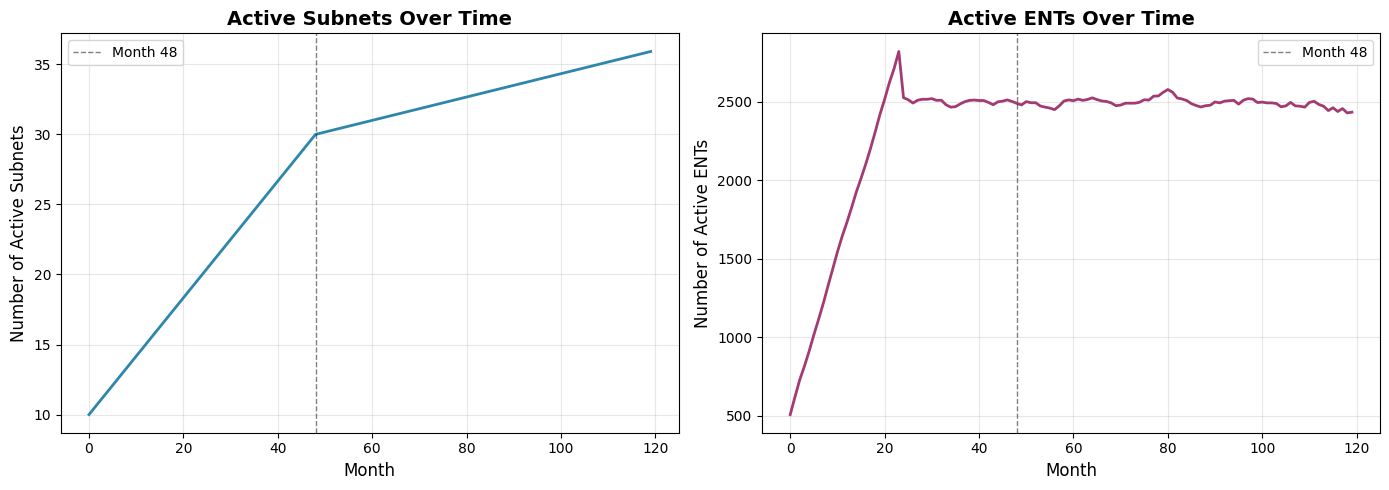

In [22]:
# Plot network growth: subnets and entities over time
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Subplot 1: Number of subnets over time
ax1 = axes[0]
ax1.plot(df_baseline['month'], df_baseline['active_subnets'], linewidth=2, color='#2E86AB')
ax1.axvline(x=48, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Month 48')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Active Subnets', fontsize=12)
ax1.set_title('Active Subnets Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Subplot 2: Number of ENTs over time
ax2 = axes[1]
ax2.plot(df_baseline['month'], df_baseline['active_ents'], linewidth=2, color='#A23B72')
ax2.axvline(x=48, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Month 48')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Number of Active ENTs', fontsize=12)
ax2.set_title('Active ENTs Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


## Revenue Burn Drop Analysis

The revenue burn shows periodic drops after Y3 due to subnet lifecycle dynamics. This is **expected behavior**, not a bug. Here's why:

- **Subnets expire after 36 months** (3 years)
- New subnets come online but **start from $0 revenue**
- Revenue grows linearly to $100k over 48 months
- When mature subnets expire and are replaced, total revenue temporarily drops

The plot below shows this cohort turnover effect.


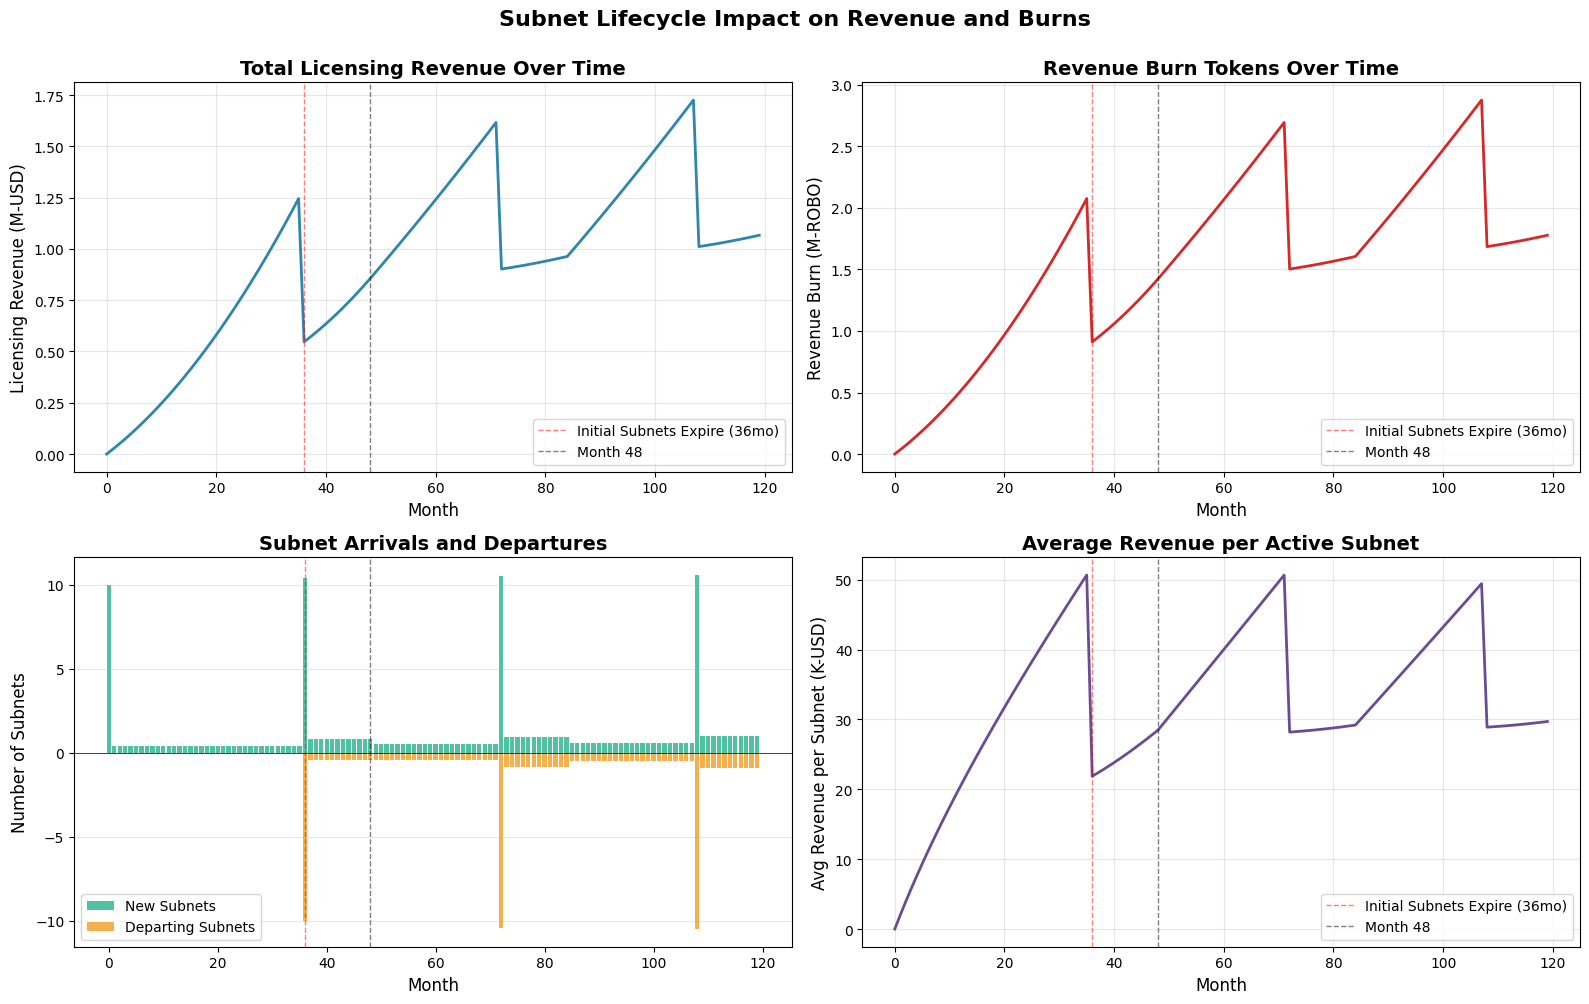

Key Insights:

Subnet Lifetime: 36 months
Revenue Growth Period: 48 months (0 → $100k)

At Month 36 (when initial subnets expire):
  - Active Subnets: 25.0
  - Departing Subnets: 10
  - New Subnets: 10
  - Total Revenue: $0.55M
  - Avg Revenue/Subnet: $21.9k


Major Revenue Burn Drops (> 100k ROBO):
--------------------------------------------------------------------------------
Month 36: Revenue burn dropped by -1.16M ROBO
  - Subnet departures: 10
  - New subnets: 10
  - Active subnets: 25

Month 72: Revenue burn dropped by -1.19M ROBO
  - Subnet departures: 10
  - New subnets: 10
  - Active subnets: 32

Month 108: Revenue burn dropped by -1.19M ROBO
  - Subnet departures: 10
  - New subnets: 11
  - Active subnets: 35



In [23]:
# Create a comprehensive visualization showing subnet lifecycle and revenue dynamics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Subplot 1: Total Licensing Revenue (USD)
ax1 = axes[0, 0]
ax1.plot(df_baseline['month'], df_baseline['licensing_revenue_usd']/1e6, linewidth=2, color='#2E86AB')
ax1.axvline(x=36, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Initial Subnets Expire (36mo)')
ax1.axvline(x=48, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Month 48')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Licensing Revenue (M-USD)', fontsize=12)
ax1.set_title('Total Licensing Revenue Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Subplot 2: Revenue Burn Tokens
ax2 = axes[0, 1]
ax2.plot(df_baseline['month'], df_baseline['revenue_burn_tokens']/1e6, linewidth=2, color='#D62828')
ax2.axvline(x=36, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Initial Subnets Expire (36mo)')
ax2.axvline(x=48, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Month 48')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Revenue Burn (M-ROBO)', fontsize=12)
ax2.set_title('Revenue Burn Tokens Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Subplot 3: Subnet Churn (Arrivals and Departures)
ax3 = axes[1, 0]
ax3.bar(df_baseline['month'], df_baseline['new_subnets'], alpha=0.7, color='#06A77D', label='New Subnets')
ax3.bar(df_baseline['month'], -df_baseline['subnet_departures'], alpha=0.7, color='#F18F01', label='Departing Subnets')
ax3.axhline(y=0, color='black', linewidth=0.5)
ax3.axvline(x=36, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax3.axvline(x=48, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax3.set_xlabel('Month', fontsize=12)
ax3.set_ylabel('Number of Subnets', fontsize=12)
ax3.set_title('Subnet Arrivals and Departures', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
ax3.legend()

# Subplot 4: Average Revenue Per Subnet
ax4 = axes[1, 1]
# Calculate average revenue per subnet
avg_revenue_per_subnet = df_baseline['licensing_revenue_usd'] / df_baseline['active_subnets'].replace(0, np.nan)
ax4.plot(df_baseline['month'], avg_revenue_per_subnet/1e3, linewidth=2, color='#6A4C93')
ax4.axvline(x=36, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Initial Subnets Expire (36mo)')
ax4.axvline(x=48, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Month 48')
ax4.set_xlabel('Month', fontsize=12)
ax4.set_ylabel('Avg Revenue per Subnet (K-USD)', fontsize=12)
ax4.set_title('Average Revenue per Active Subnet', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.suptitle('Subnet Lifecycle Impact on Revenue and Burns', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Print some key insights
print("Key Insights:")
print("=" * 80)
print(f"\nSubnet Lifetime: 36 months")
print(f"Revenue Growth Period: 48 months (0 → $100k)")
print(f"\nAt Month 36 (when initial subnets expire):")
print(f"  - Active Subnets: {df_baseline['active_subnets'].iloc[36]:.1f}")
print(f"  - Departing Subnets: {df_baseline['subnet_departures'].iloc[36]:.0f}")
print(f"  - New Subnets: {df_baseline['new_subnets'].iloc[36]:.0f}")
print(f"  - Total Revenue: ${df_baseline['licensing_revenue_usd'].iloc[36]/1e6:.2f}M")
print(f"  - Avg Revenue/Subnet: ${df_baseline['licensing_revenue_usd'].iloc[36]/df_baseline['active_subnets'].iloc[36]/1e3:.1f}k")

# Find major drops in revenue burn
df_baseline['revenue_burn_change'] = df_baseline['revenue_burn_tokens'].diff()
major_drops = df_baseline[df_baseline['revenue_burn_change'] < -100000]  # Drops > 100k tokens

print(f"\n\nMajor Revenue Burn Drops (> 100k ROBO):")
print("-" * 80)
for idx, row in major_drops.iterrows():
    print(f"Month {row['month']:.0f}: Revenue burn dropped by {row['revenue_burn_change']/1e6:.2f}M ROBO")
    print(f"  - Subnet departures: {row['subnet_departures']:.0f}")
    print(f"  - New subnets: {row['new_subnets']:.0f}")
    print(f"  - Active subnets: {row['active_subnets']:.0f}")
    print()
